# Streamit URL



## Connect-4 dataset
I chose a dataset that contains all legal 8-ply positions in the game of connect-4 in which neither player has won yet, and in which the next move is not forced.

There are 2 players (X and O), the outcome of the match is either win, lose or draw for player X.
I chose this because I already know what connect-4 is and how it works so it will be easier to interpret and understand the data compared to a dataset that is about a topic where I barely know anything about.

## What is an EDA?
Exploratory Data Analysis (EDA) is a method used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them

### There are 8 steps in performing an EDA:
- Import Libraries and Load Dataset: importing necessary libraries such as pandas, numpy, graphviz, etc., and load your dataset.
- Check for Missing Values
- Visualizing the Missing Values: Use visual techniques to identify where the missing values are located
- Replacing the Missing Values: Decide on a strategy to handle these missing values
- Asking Analytical Questions and Visualizations: Formulate questions you want to answer from the dataset and use visualizations to find these answers
- Data Cleaning/Wrangling: Clean the data by removing duplicates, handling outliers, etc
- Feature Engineering: Explore various variables and their transformations to create new features or derive meaningful insights
- Statistics Summary: Generate summary statistics for numerical data in the dataset

#### Import Libraries and Load Dataset
The first step is to install and import the packages and load the dataset.

In [2]:
!pip install graphviz
!pip install pydotplus
!pip install pandas
!pip install seaborn
!pip install streamlit


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd

The dataset is read and put in a dataframe.

In [5]:
# load dataset
connect_df = pd.read_csv("connect-4.data/connect-4.data", sep=',')

I use the describe function to give a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values.
The describe function didn't show all the columns so I had to define this manually to use 43 columns because the dataset has 43 columns.

In [6]:
with pd.option_context('display.max_columns', 43):
    print(connect_df.describe())

            b    b.1    b.2    b.3    b.4    b.5    b.6    b.7    b.8    b.9  \
count   67556  67556  67556  67556  67556  67556  67556  67556  67556  67556   
unique      3      3      3      3      3      3      3      3      3      3   
top         b      b      b      b      b      b      x      b      b      b   
freq    24981  43384  55332  61615  65264  67039  25889  41179  54351  61205   

         b.10   b.11      x      o   b.12   b.13   b.14   b.15    x.1    o.1  \
count   67556  67556  67556  67556  67556  67556  67556  67556  67556  67556   
unique      3      3      3      3      3      3      3      3      3      3   
top         b      b      x      b      b      b      b      b      b      b   
freq    65203  67041  32032  37671  52897  60722  65142  67043  29016  46933   

          x.2    o.2    x.3    o.3   b.16   b.17   b.18   b.19   b.20   b.21  \
count   67556  67556  67556  67556  67556  67556  67556  67556  67556  67556   
unique      3      3      3      3    

Here I get my first problem where the dataset didn't contain column names. This is a problem because the describe function takes the top row to define the columns of the dataset. In this case the top row also has values: [b,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win] so I have to change the dataset to include column names.

The dataset was originally made with this layout for the connect-4 playboard where the possible spots are represented like cöordinates:

<img src="resources/Playboard.png" style="height: 300px"/>

So I applied these cöordinates to the names of the columns in the updated dataset:

In [7]:
# load updated dataset
updatedConnect_df = pd.read_csv("connect-4.data/connect-4-with-column-names.data", sep=',')

with pd.option_context('display.max_columns', 43):
    print(updatedConnect_df.describe())

           A1     A2     A3     A4     A5     A6     B1     B2     B3     B4  \
count   67557  67557  67557  67557  67557  67557  67557  67557  67557  67557   
unique      3      3      3      3      3      3      3      3      3      3   
top         b      b      b      b      b      b      x      b      b      b   
freq    24982  43385  55333  61616  65265  67040  25889  41180  54352  61206   

           B5     B6     C1     C2     C3     C4     C5     C6     D1     D2  \
count   67557  67557  67557  67557  67557  67557  67557  67557  67557  67557   
unique      3      3      3      3      3      3      3      3      3      3   
top         b      b      x      b      b      b      b      b      b      b   
freq    65204  67042  32033  37671  52898  60723  65143  67044  29016  46933   

           D3     D4     D5     D6     E1     E2     E3     E4     E5     E6  \
count   67557  67557  67557  67557  67557  67557  67557  67557  67557  67557   
unique      3      3      3      3    

As you can see I only get 4 statistics back because the dataset contains String values.
the 4 statistics are describes as such:
- Count: Number of non-null (or, non-NaN) observations. This gives you the total number of non-null entries in the column.
    - In this case we have 67556 rows + 1 row for the column names for each column. This also confirms that there are no missing values because the amount of rows in the dataset is also 67556.
- Unique: Number of distinct values in a column. This tells you how many different categories or labels are present in the column.
    - There are 3 unique values for each possible cöordinate on the board:
        - b = blank
        - x = player x has taken this cöordinate
        - o = player o has taken this cöordinate
- Top: Most frequent value. This is the value that appears most often in the column.
    - for the most part the blank option is the most used in each row except for row A6 and B6.
- Freq: Frequency of the most frequent value. This tells you how many times the most frequent value appears in the column.

### Show the data on the board

In this code you can see how a row in the dataset represents a state on the board.

In [8]:
# Select a row from the DataFrame
selected_row = updatedConnect_df.iloc[10]  # You can change this to select other rows

# Now I convert the selected row into a 7x6 numpy array
board = np.array(selected_row[:-1]).reshape(7, 6)

# Transpose the board
board = board.T
# Reverse the rows
board = board[::-1]

# Print the board
print(board)

[['b' 'b' 'b' 'o' 'b' 'b' 'b']
 ['b' 'b' 'b' 'x' 'b' 'b' 'b']
 ['b' 'b' 'b' 'o' 'b' 'b' 'b']
 ['b' 'b' 'b' 'x' 'b' 'b' 'b']
 ['b' 'b' 'b' 'o' 'b' 'b' 'b']
 ['o' 'x' 'b' 'x' 'b' 'b' 'b']]


## Split the data

Given the cöordinates I will predict if the outcome will result in a win a loss or a draw. N?ow to split the features and the target variable:

In [9]:
# split dataset in features and target variable

feature_cols = ['A1','A2','A3','A4','A5','A6','B1','B2','B3','B4','B5','B6','C1','C2','C3','C4','C5','C6','D1','D2','D3','D4','D5','D6','E1','E2','E3','E4','E5','E6','F1','F2','F3','F4','F5','F6','G1','G2','G3','G4','G5','G6']

X = updatedConnect_df[feature_cols]
y = updatedConnect_df[['Outcome']] # target variable

In [10]:
print(X)

      A1 A2 A3 A4 A5 A6 B1 B2 B3 B4  ... F3 F4 F5 F6 G1 G2 G3 G4 G5 G6
0      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b  b
1      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b  b
2      b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b  b
3      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b  b
4      o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b  b
...   .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
67552  x  x  b  b  b  b  o  x  o  b  ...  b  b  b  b  o  o  x  b  b  b
67553  x  x  b  b  b  b  o  b  b  b  ...  b  b  b  b  o  x  o  o  x  b
67554  x  x  b  b  b  b  o  o  b  b  ...  b  b  b  b  o  x  x  o  b  b
67555  x  o  b  b  b  b  o  b  b  b  ...  b  b  b  b  o  x  o  x  x  b
67556  x  o  o  o  x  b  o  b  b  b  ...  b  b  b  b  x  b  b  b  b  b

[67557 rows x 42 columns]


In [11]:
print(y)

      Outcome
0         win
1         win
2         win
3         win
4         win
...       ...
67552    loss
67553    draw
67554    loss
67555    draw
67556    draw

[67557 rows x 1 columns]


Firstly I need to train the machine learning techniques. To do this I first need to install `category_encoders` to replace the categories with numeric values because **the decision trees implemented in scikit-learn use only numerical features and these features are interpreted always as continuous numeric variables.**

In [12]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Here I replace the categories with numerical values using `One-Hot encoding`. With one-hot encoding, we convert each categorical value into a new categorical value and assign a binary value of 1 or 0.

In [13]:
import category_encoders as ce

ce_oh = ce.OneHotEncoder(cols = feature_cols)
X_cat_oh = ce_oh.fit_transform(X)

What the encoder does is put a 1 on the spot where it sees something is 'filled in'. every feature is splitted into 3 columns because there are 3 possible values for each feature. A1 becomes [A1_1, A1_2, A1_3], these 3 values represent the possible values [b, o, x] and if for example b is filled in in A1 then A1_1 gets the value 1.

In [14]:
print(X_cat_oh)

       A1_1  A1_2  A1_3  A2_1  A2_2  A2_3  A3_1  A3_2  A3_3  A4_1  ...  G3_3  \
0         1     0     0     1     0     0     1     0     0     1  ...     0   
1         1     0     0     1     0     0     1     0     0     1  ...     0   
2         1     0     0     1     0     0     1     0     0     1  ...     0   
3         1     0     0     1     0     0     1     0     0     1  ...     0   
4         0     1     0     1     0     0     1     0     0     1  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
67552     0     0     1     0     0     1     1     0     0     1  ...     1   
67553     0     0     1     0     0     1     1     0     0     1  ...     0   
67554     0     0     1     0     0     1     1     0     0     1  ...     1   
67555     0     0     1     0     1     0     1     0     0     1  ...     0   
67556     0     0     1     0     1     0     0     1     0     0  ...     0   

       G4_1  G4_2  G4_3  G5_1  G5_2  G5

The dataset still needs to be splitted into training data and testing data. The process of splitting the data involves randomly assigning data points to either the training set or the test set. A common split ratio is 80% for training and 20% for testing, but this can vary depending on the size and nature of a dataset.

Here I split 20% of the data into test data and 80% into training data. I also use a seed for the random number generator used for the split.

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cat_oh, y, test_size=0.2, random_state=42)

These are the labels for the confusion matrix

In [16]:
labels = ['draw', 'lose', 'win']

## Decision Tree

For the first ML learning algorithm I will use the decision tree.

A decision tree is capable of performing classification on a dataset. It takes 2 arrays as input:
- Array X, these are the training samples so in this case the positions players have taken on the board.
- Array Y, these are the labels for the training samples so in this case the outcome of the sample (win, lose, draw).

Now we can try to train the classifier (decision tree) with the training data.

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_train, y_train)

Now we can make predictions using the test data.

In [18]:
predictions = clf.predict(X_test)

And then calculate the accuracy of the algorithm using the actual target values of the test data and compare them with the predicted values.

I also make a confusion matrix to get an overview of the predictions.

Accuracy:  76.0 %


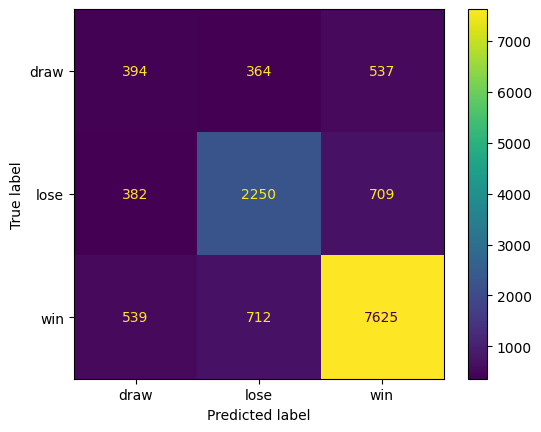

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", round(accuracy, 2) * 100, "%")

# compute the confusion matrix
cmTree = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cmTree, display_labels=labels).plot()

In the graph above you can see when the model predicted right and when it went wrong.

The labels on the left are what the outcome of the test data actually was whilst the labels on the bottom are the predictions the model made.

So for example with the decision tree if a sample had an outcome 'draw' the model would predict the right outcome 391 times (top left square).

The other times it would predict 'draw' 382 times for an outcome that was supposed to be 'lose'.

From this confusion matrix we can see that it got a lot of predictions right when it came to the outcome 'win', this is because there are a lot more samples in the dataset where the actual outcome is 'win' so it was trained better to predict that outcome.

## Support Vector Machine

Support Vector Machine (SVM) is a machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks, but it is best suited for classification.
SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data.

What the SVM algorithm does is find the optimal **hyperplane** in a N-dimensional space that separates the data in different classes. In other words the distance between the closest data points from 2 different classes should be as big as possible.
The hyperplane serves as a decision boundary to seperate all the data points of different classes in the feature space.

The dimension of the hyperplane depends on the amount of features in the dataset, here it will be a 42-dimensional hyperplane.

### How does it work with an example

In a dataset with 2 features the hyperplane is a line because 2 features means it is 2 dimensional. Let's say we have 2 classes in the dataset represented as blue and red in the image:


<img src="resources/svm1.svg.png" style="height: 300px">

The algorithm then chooses which hyperplane is located the furthest away from both the nearest data points from the red and blue classes. This hyperplane is also known as the **maximum-margin hyperplane**.

In the image above the best **maximum-margin hyperplane** is clearly "A" because the distance from the 2 nearest data points from both red and blue is greater then the distance from the 2 nearest data points from both red and blue on hyperplane "B".

### Outliers

What if a red data point is located under the hyperplane (so in the area of the blue data points)?

In this case the maximum-margin hyperplane is located the same way as normal, but a penalty is given each time a data point crosses the hyperplane. so here a red point in the blue area gives a penalty.

### Extra

This technique takes about 5 minutes to train and test on this dataset in the code below as well as in streamlit.

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

I Create a StandardScaler instance to normalize the feature values

The I Fit the scaler to the training data and transform it. I also do this with the test data.

In [ ]:
# Create a scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

I Create a Support Vector Machine (SVM) classifier

I Train the SVM classifier on the scaled training data

It Makes predictions on the scaled test data

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, np.ravel(y_train))

predictions = svm_clf.predict(X_test_scaled)

Here I calculate the accuracy of the model by comparing predicted labels with true labels and I plot a confusion matrix to evaluate the model's performance.

Accuracy:  81.0 %


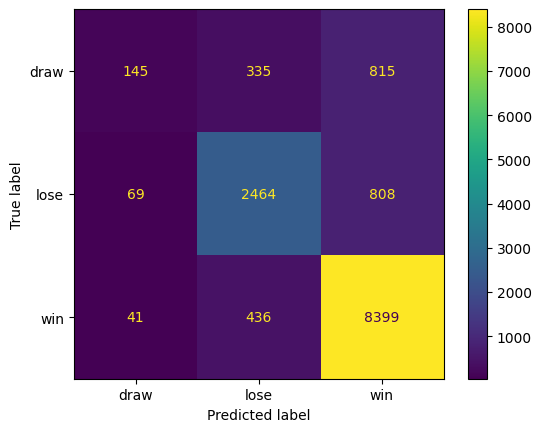

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", round(accuracy, 2) * 100, "%")

# compute the confusion matrix
cmVector = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cmVector, display_labels=labels).plot()

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm that is used for optimizing machine learning models. It is more efficient when dealing with larger datasets compared to the regular Gradient Descent algorithm.

In SGD, instead of using the entire dataset for each iteration, only a single random training example or batch is selected to calculate the gradient and update the model parameters.

### How does it work

there are 4 steps in the algorithm:
- Initialization: first the parameters of the model are randomly initialized.
- Set parameters: then the parameters are set by defining the number of iterations and the learning rate.
- Stochastic Gradient descent loop: here there are  5 more steps:
    - The training dataset is shuffled to achieve randomness
    - Then we iterate over each training sample or batch
    - Compute the gradient of the cost function with respect to the model parameters using the current training example (or batch).
    - Update the model parameters by taking a step in the direction of the negative gradient, scaled by the learning rate.
    - Evaluate the convergence criteria, such as the difference in the cost function between iterations of the gradient.
- Return optimized parameters: Once the convergence criteria are met or the maximum number of iterations is reached, return the optimized model parameters.

Here I Create an instance of the SGD Classifier with specified parameters

In [22]:
from sklearn.linear_model import SGDClassifier

lr_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=100)
lr_clf.fit(X_train, np.ravel(y_train))

predictions = lr_clf.predict(X_test)

Here I calculate the accuracy of the model by comparing predicted labels with true labels and I plot a confusion matrix to evaluate the model's performance.

Accuracy:  76.0 %


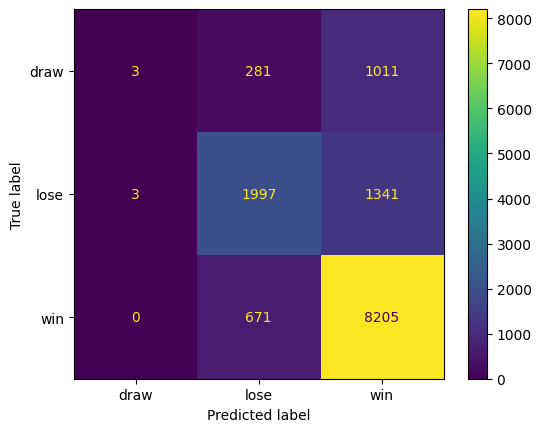

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", round(accuracy, 2) * 100, "%")

# compute the confusion matrix
cmGradient = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cmGradient, display_labels=labels).plot()

## Comparison

Decision Tree
Support Vector Machine
Stochastic Gradient Descent


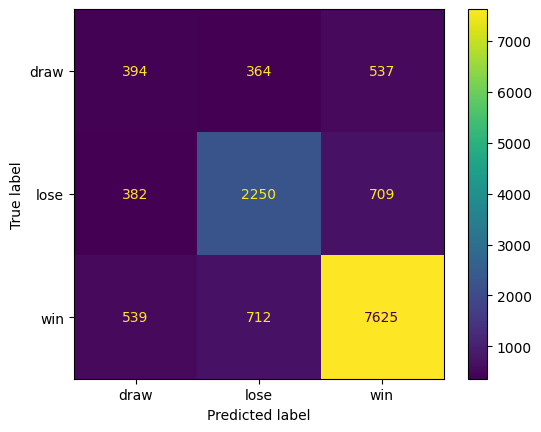

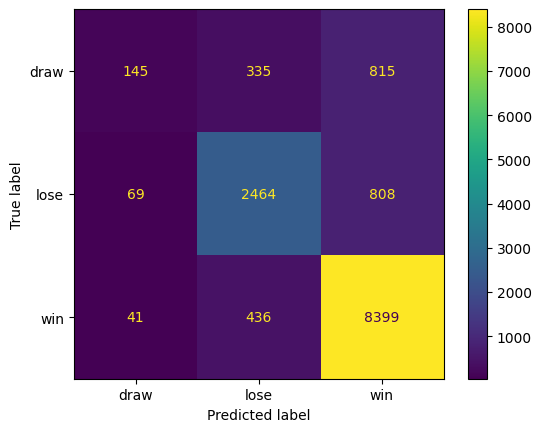

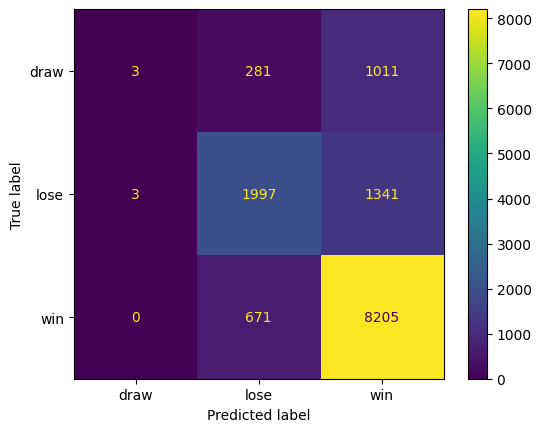

In [24]:
print("Decision Tree")
ConfusionMatrixDisplay(cmTree, display_labels=labels).plot()

print("Support Vector Machine")
ConfusionMatrixDisplay(cmVector, display_labels=labels).plot()

print("Stochastic Gradient Descent")
ConfusionMatrixDisplay(cmGradient, display_labels=labels).plot()

To compare the different algorithms we can look at their confusion matrices.

- Top confusion matrix: Decision Tree
- Middle confusion matrix: Support Vector Machine
- Bottom confusion matrix: Stochastic Gradient Descent

In each confusion matrix the correct prediction for each of the possible outcomes is shown in the diagonal from the top left corner to the bottom right corner. The other values are predictions that were not correct. With this in mind we can see which algorithm is used best for this dataset.

What immediatly catches my eye is that the Stochastic Gradient descent algorithm doesn't work well if the label from the dataset has more than 2 options. I can conlude this from the matrix because it barely predicts any draws whilst the other algorithms predict a decent amount of draws. This makes the SGD the worst option to use on this dataset.

The decision tree makes a lot of false predictions when it predicts it is a draw. This is probably due to the draw outcome being the least common in the training dataset. The SVM algorithm is better at predicting the right outcomes for all possibilities. This makes it the most accurate of the 3 algorithms but it also takes about 5 minutes to train, so if a faster solution is needed a decision tree is best to use else the SVM gives more accurate predictions.

## Generative AI Tools
### Prompts used
- What is an EDA and how do I perform this on a dataset? - BingAI - with this prompt a very long explanation was given about EDA followed by the steps that need to be performed in that process.

- Using the pandas library explain what describe does - BingAI - I get an explanation of all the statistics from the describe function output and the function is also shown iin an example but the statistics aren't the same as mine because i have a dataset with String values so I had to ask further:
    - I apply this function on a dataset with string values so explain the statistics from that result - bingAI - Now it gives me the right statisticsand explains them.

- Briefly explain the ML learning alogrithm for a decision tree - BingAI - This gives a short explanation of the algorithm with an example, in this example it also shows how to divide the dataset into training data and test data so I asked more information about this:
    - explain how the splitting of the data into training data and test data works - BingAI - Here it gives a reason why data is splitted into test and training data and it also says that usually 80% of the data is training data and 20% is test data.

- Explain what one hot encoding is - BingAI - Here it gives a complicated explanation of what one-hot encoding is.

- show how I can make an accuracy of the decision tree when i'm using one hot encoding - BingAI - Here it gives example code showing how I can measure the accuracy of the algorithm, but it only showed how to get the accuracy so I asked if there were more measurements possible:
    - are there more ways of measuring the ML algorithm so i can compare it to other algorityhms? - BingAI - It then gives different ways for measuring ML algorithms for classification, regression, clustering and ranking.